In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.lines import Line2D
from scipy.stats import beta as beta_dist
import pandas as pd
from tabulate import tabulate
import warnings
import seaborn as sns
import os.path as osp
import os
import pdb
from copy import deepcopy

In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
from matplotlib import rcParams
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as mticker
rcParams['font.family'] = 'serif'
import matplotlib
matplotlib.style.use('classic')

In [3]:
%load_ext autoreload
%autoreload 2
from rankingFairness.src.experimentMultipleGroups import simpleOfflineMultipleGroups, MARKERS, COLORMAP
from rankingFairness.src.tradeoffMultipleGroups import getSummaryStat, compute_norm_entropy, compute_entropy, computeiDCG
from rankingFairness.src.utils import set_seed
from rankingFairness.src.plot.main_figs import plot_synthetic, plot_synthetic_rev1
from rankingFairness.src.rankingsMultipleGroups import PRP_Ranker, EO_RankerII, TS_RankerII, DP_Ranker, Uniform_Ranker, epiRAnker, exposure, DP_RankerIII, exposure_DP
from rankingFairness.src.distributions import Bernoulli, BetaBernoulli, Multinomial, DrichletMultinomial, Drichlet

In [4]:
SEED=42
set_seed(SEED)
# save_path='/share/thorsten/rr568/CostOptimal_FairRankings/plots'

In [5]:
rankingAlgos=[EO_RankerII, DP_Ranker, PRP_Ranker, TS_RankerII, Uniform_Ranker, exposure, epiRAnker]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 10408.99it/s]


 with exposure threshold as :0.95
exposure achieved with RA: 0.968121552240516
found feasible solution at exp_thresh:1.0
objective:6.304487936548955


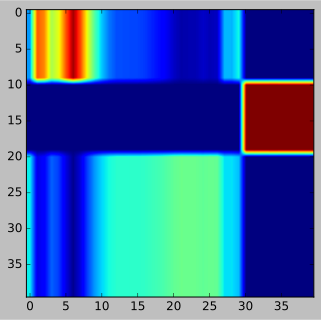

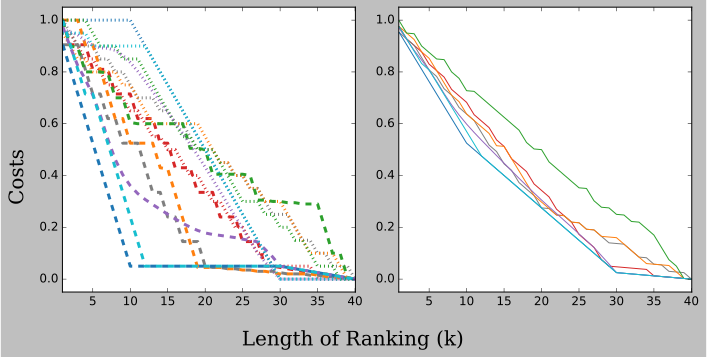

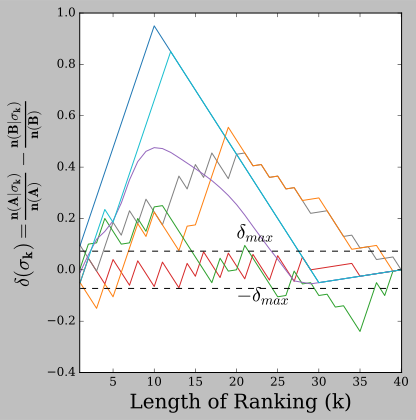

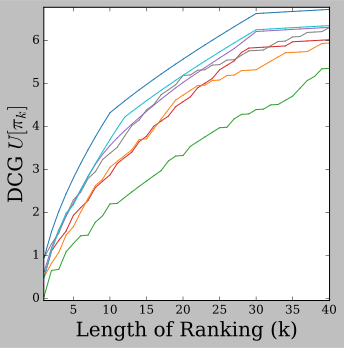

In [6]:
A_true=[0.95]*10+[0.05]*10
B_true=[0.5]*20

A_dist = [Bernoulli(p) for p in A_true]
B_dist = [Bernoulli(p) for p in B_true]

num_docs=len(A_true)+len(B_true)
exp = simpleOfflineMultipleGroups(num_groups=2, num_docs=num_docs, verbose=True,
                    predfined_ls=[A_dist, B_dist], distType=BetaBernoulli)
exp.experiment(rankingAlgos=rankingAlgos,
               simulations=100)

cost_groups=exp.cost_groups
group_cost_std=exp.group_cost_std
EO_constraint=exp.EO_constraint
total_cost=exp.total_cost
total_cost_std=exp.total_cost_std
dcg_util=exp.dcgUtil
rel = np.hstack((A_true,B_true))
assert rel.shape==(num_docs,)
iDcg = computeiDCG(np.array(rel)) 
nDCG=np.full((len(rankingAlgos), num_docs), 0.0, dtype=float)
for i, r in enumerate(rankingAlgos):
    nDCG[i,:]= np.divide(dcg_util[i,:],iDcg)
delta_max=exp.delta_max

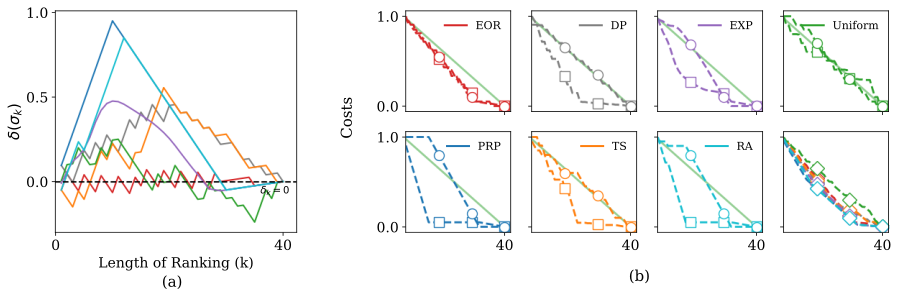

In [7]:
save_path='/share/thorsten/rr568/CostOptimal_FairRankings/plots'
filename=f"synthetic_main_disp_unc_rev1.pdf"
rankingAlgos=[EO_RankerII, DP_Ranker, PRP_Ranker, TS_RankerII, Uniform_Ranker, exposure, epiRAnker]
rankingAlgosName=[r.name() for r in rankingAlgos]
rankingAlgos_dict={'EOR':0,
                   'DP':1, 
                   'PRP':2, 
                   'TS':3, 
                   'Uniform':4,
                  'EXP':5,
                  'RA':6}
SynthMarker_dict={'Group A': MARKERS[0],
                  'Group B': MARKERS[1],
                  'Principal': MARKERS[4],}


num_docs=total_cost.shape[-1]
fig_kw={}
fig_kw['markevery']=(int(num_docs/3),int(num_docs/3))
fig_kw['linewidth']=2
fig_kw['markersize']=10
fig_kw['markeredgecolor']='black'
fig_kw['ticklabelsize']=14
fig_kw['yLabelSize']=15
fig_kw['alpha_stochastic']=0.5
fig_kw['offset']=0.06

fig_kw['nrows']=1
fig_kw['ncols']=1
fig_kw['interval_y']=0.5
fig_kw['hspace']=0.025
fig_kw['wspace']=0.025
fig_kw['rasterized']=True

# dcg_option=True
# dcg=dcg_util
# fig_kw['figsize']=(15,3.6)

fig_kw['figsize']=(13,4)
dcg=None
dcg_option=False

plot_synthetic_rev1(EO_constraint, cost_groups, total_cost, rankingAlgos, rankingAlgos_dict, SynthMarker_dict,
    save_path, filename, fig_kw, dcg_option=dcg_option, dcg=dcg)



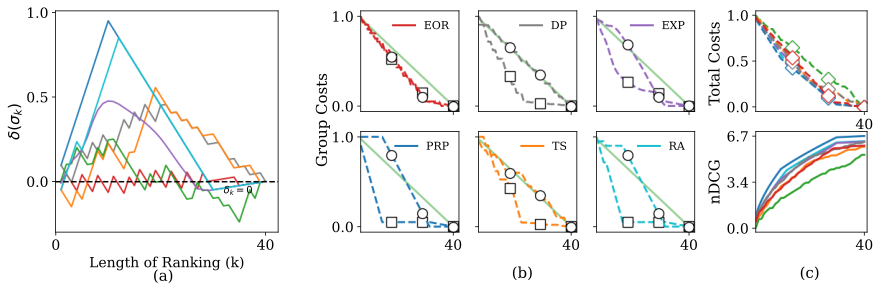

In [8]:
save_path='/share/thorsten/rr568/CostOptimal_FairRankings/plots'
filename=f"synthetic_main_disp_unc.pdf"
rankingAlgos=[EO_RankerII, DP_Ranker, PRP_Ranker, TS_RankerII, Uniform_Ranker, exposure, epiRAnker]
rankingAlgosName=[r.name() for r in rankingAlgos]
rankingAlgos_dict={'EOR':0,
                   'DP':1, 
                   'PRP':2, 
                   'TS':3, 
                   'Uniform':4,
                  'EXP':5,
                  'RA':6}
SynthMarker_dict={'Group A': MARKERS[0],
                  'Group B': MARKERS[1],
                  'Principal': MARKERS[4],}


num_docs=total_cost.shape[-1]
fig_kw={}
fig_kw['markevery']=(int(num_docs/3),int(num_docs/3))
fig_kw['linewidth']=2
fig_kw['markersize']=10
fig_kw['markeredgecolor']='black'
fig_kw['ticklabelsize']=14
fig_kw['yLabelSize']=15
fig_kw['alpha_stochastic']=0.5
fig_kw['offset']=0.06
fig_kw['nrows']=1
fig_kw['ncols']=1
fig_kw['interval_y']=0.5
fig_kw['hspace']=0.025
fig_kw['wspace']=0.025
fig_kw['rasterized']=True

dcg_option=True
dcg=dcg_util
fig_kw['figsize']=(12,4)

# fig_kw['figsize']=(14,4)
# dcg=None
# dcg_option=False

plot_synthetic(EO_constraint, cost_groups, total_cost, rankingAlgos, rankingAlgos_dict, SynthMarker_dict,
    save_path, filename, fig_kw, dcg_option=dcg_option, dcg=dcg)

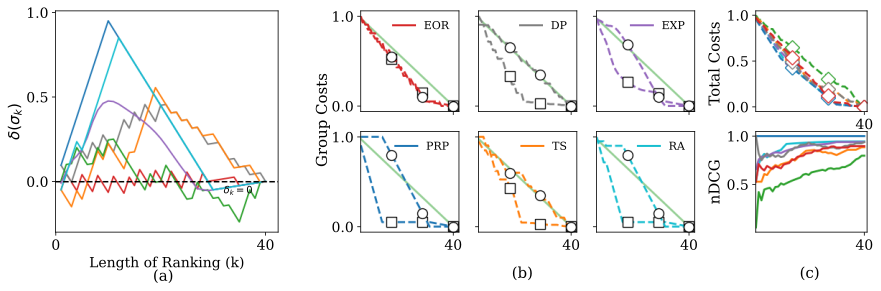

In [9]:
save_path='/share/thorsten/rr568/CostOptimal_FairRankings/plots'
filename=f"synthetic_main_disp_unc_ndcg.pdf"
rankingAlgos=[EO_RankerII, DP_Ranker, PRP_Ranker, TS_RankerII, Uniform_Ranker, exposure, epiRAnker]
rankingAlgosName=[r.name() for r in rankingAlgos]
rankingAlgos_dict={'EOR':0,
                   'DP':1, 
                   'PRP':2, 
                   'TS':3, 
                   'Uniform':4,
                  'EXP':5,
                  'RA':6}
SynthMarker_dict={'Group A': MARKERS[0],
                  'Group B': MARKERS[1],
                  'Principal': MARKERS[4],}


num_docs=total_cost.shape[-1]
fig_kw={}
fig_kw['markevery']=(int(num_docs/3),int(num_docs/3))
fig_kw['linewidth']=2
fig_kw['markersize']=10
fig_kw['markeredgecolor']='black'
fig_kw['ticklabelsize']=14
fig_kw['yLabelSize']=15
fig_kw['alpha_stochastic']=0.5
fig_kw['offset']=0.06
fig_kw['nrows']=1
fig_kw['ncols']=1
fig_kw['interval_y']=0.5
fig_kw['hspace']=0.025
fig_kw['wspace']=0.025
fig_kw['rasterized']=True

dcg_option=True
dcg=nDCG
fig_kw['figsize']=(12,4)



plot_synthetic(EO_constraint, cost_groups, total_cost, rankingAlgos, rankingAlgos_dict, SynthMarker_dict,
    save_path, filename, fig_kw, dcg_option=dcg_option, dcg=dcg)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 8041.23it/s]


 with exposure threshold as :0.95
exposure achieved with RA: 0.9648280797525318
found feasible solution at exp_thresh:1.0
objective:8.264309480920412


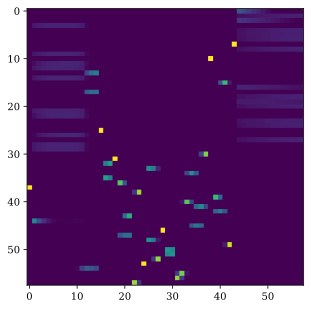

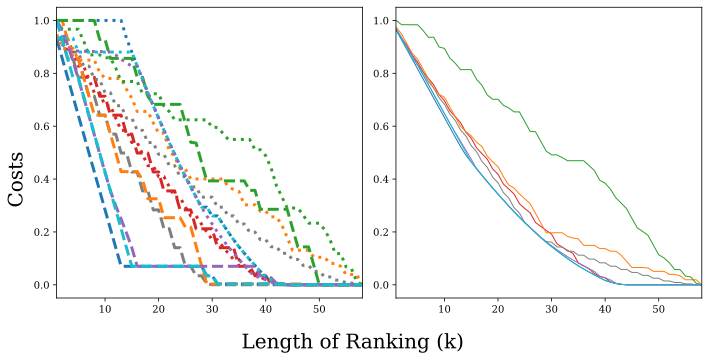

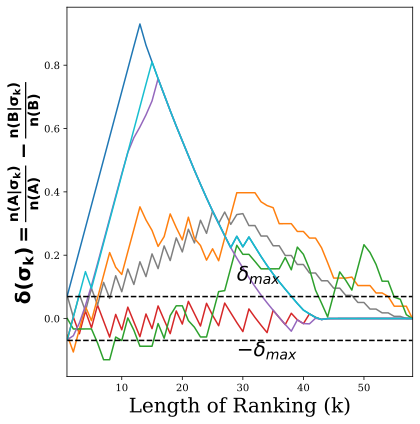

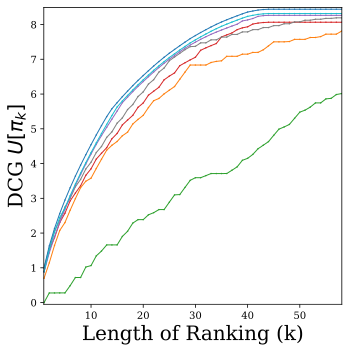

In [10]:
size_A=30
A_true = np.random.beta(a=1/20,b=1/20, size=size_A)
n_A=sum(A_true)
B_true=[]
n_B=0

rel_diff=1
while abs(n_A-n_B)>=rel_diff:
    B_true.append(np.random.beta(a=5,b=5, size=1).item())
    n_B=sum(B_true)

A_dist = [Bernoulli(p) for p in A_true]
B_dist = [Bernoulli(p) for p in B_true]

num_docs=len(A_true)+len(B_true)
exp = simpleOfflineMultipleGroups(num_groups=2, num_docs=num_docs, verbose=True,
                    predfined_ls=[A_dist, B_dist], distType=BetaBernoulli)
exp.experiment(rankingAlgos=[EO_RankerII, DP_Ranker, PRP_Ranker, TS_RankerII, Uniform_Ranker, exposure, epiRAnker],
               simulations=100)

cost_groups=exp.cost_groups
group_cost_std=exp.group_cost_std
EO_constraint=exp.EO_constraint
total_cost=exp.total_cost
total_cost_std=exp.total_cost_std
# EOR_std=exp.EOR_std
delta_max=exp.delta_max
dcg_util=exp.dcgUtil
rel = np.hstack((A_true,B_true))
assert rel.shape==(num_docs,)
iDcg = computeiDCG(np.array(rel)) 
nDCG=np.full((len(rankingAlgos), num_docs), 0.0, dtype=float)
for i, r in enumerate(rankingAlgos):
    nDCG[i,:]= np.divide(dcg_util[i,:],iDcg)

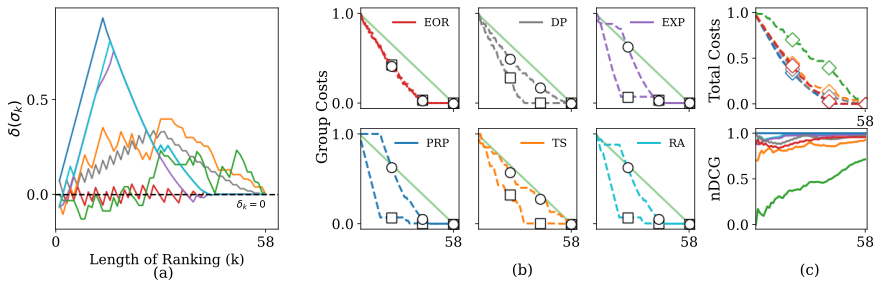

In [11]:
save_path='/share/thorsten/rr568/CostOptimal_FairRankings/plots'
filename=f"synthetic_high_disp_unc.pdf"
rankingAlgos=[EO_RankerII, DP_Ranker, PRP_Ranker, TS_RankerII, Uniform_Ranker, exposure, epiRAnker]
rankingAlgosName=[r.name() for r in rankingAlgos]
rankingAlgos_dict={'EOR':0,
                   'DP':1, 
                   'PRP':2, 
                   'TS':3, 
                   'Uniform':4,
                  'EXP':5,
                  'RA':6}
SynthMarker_dict={'Group A': MARKERS[0],
                  'Group B': MARKERS[1],
                  'Principal': MARKERS[4],}


num_docs=total_cost.shape[-1]
fig_kw={}
fig_kw['markevery']=(int(num_docs/3),int(num_docs/3))
fig_kw['linewidth']=2
fig_kw['markersize']=10
fig_kw['markeredgecolor']='black'
fig_kw['markeredgewidth']=1
fig_kw['ticklabelsize']=14
fig_kw['yLabelSize']=15
fig_kw['alpha_stochastic']=0.5
fig_kw['offset']=0.06
fig_kw['nrows']=1
fig_kw['ncols']=1
fig_kw['interval_y']=0.5
fig_kw['hspace']=0.025
fig_kw['wspace']=0.025
fig_kw['rasterized']=True

dcg_option=True
dcg=nDCG
fig_kw['figsize']=(12,4)

# fig_kw['figsize']=(14,4)
# dcg=None
# dcg_option=False

plot_synthetic(EO_constraint, cost_groups, total_cost, rankingAlgos, rankingAlgos_dict, SynthMarker_dict,
    save_path, filename, fig_kw, dcg_option=dcg_option, dcg=dcg)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 11691.11it/s]


 with exposure threshold as :0.95
exposure achieved with RA: 0.9816124589642101
found feasible solution at exp_thresh:1.0
objective:8.418498578144499


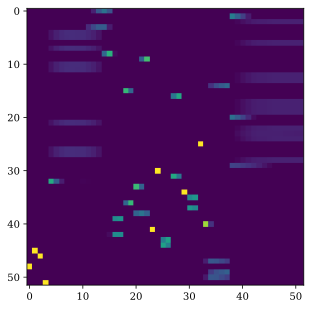

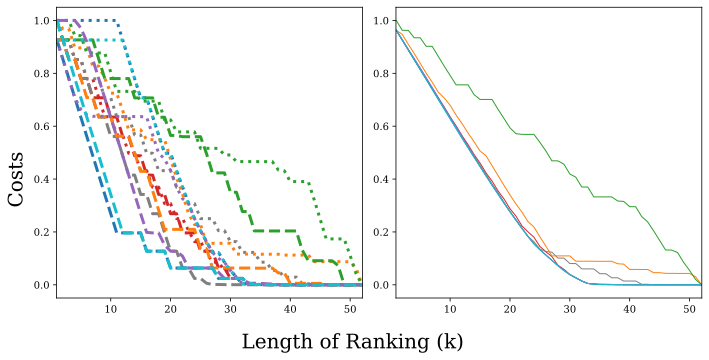

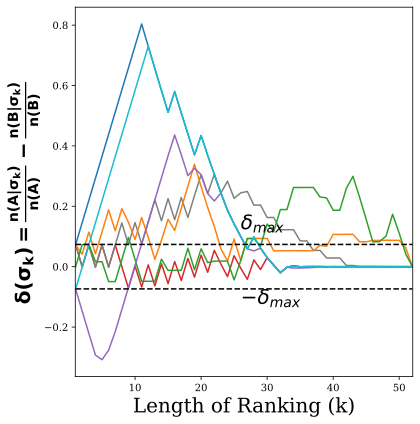

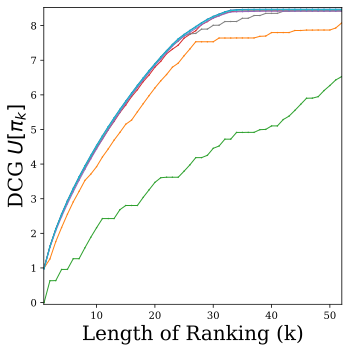

In [12]:
size_A=30
A_true = np.random.beta(a=1/20,b=1/20, size=size_A)
n_A=sum(A_true)
B_true=[]
n_B=0

rel_diff=1
while abs(n_A-n_B)>=rel_diff:
    B_true.append(np.random.beta(a=1/2,b=1/2, size=1).item())
    n_B=sum(B_true)

A_dist = [Bernoulli(p) for p in A_true]
B_dist = [Bernoulli(p) for p in B_true]

num_docs=len(A_true)+len(B_true)
exp = simpleOfflineMultipleGroups(num_groups=2, num_docs=num_docs, verbose=True,
                    predfined_ls=[A_dist, B_dist], distType=BetaBernoulli)
exp.experiment(rankingAlgos=[EO_RankerII, DP_Ranker, PRP_Ranker, TS_RankerII, Uniform_Ranker, exposure, epiRAnker],
               simulations=100)

cost_groups=exp.cost_groups
group_cost_std=exp.group_cost_std
EO_constraint=exp.EO_constraint
total_cost=exp.total_cost
total_cost_std=exp.total_cost_std
# EOR_std=exp.EOR_std
delta_max=exp.delta_max
dcg_util=exp.dcgUtil
rel = np.hstack((A_true,B_true))
assert rel.shape==(num_docs,)
iDcg = computeiDCG(np.array(rel)) 
nDCG=np.full((len(rankingAlgos), num_docs), 0.0, dtype=float)
for i, r in enumerate(rankingAlgos):
    nDCG[i,:]= np.divide(dcg_util[i,:],iDcg)

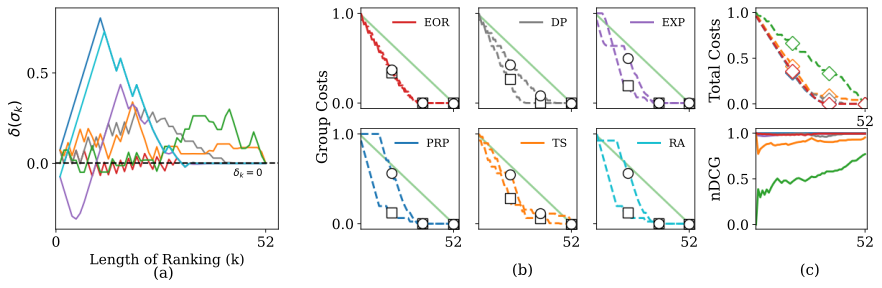

In [13]:
save_path='/share/thorsten/rr568/CostOptimal_FairRankings/plots'
filename=f"synthetic_medium_disp_unc.pdf"
rankingAlgos=[EO_RankerII, DP_Ranker, PRP_Ranker, TS_RankerII, Uniform_Ranker, exposure, epiRAnker]
rankingAlgosName=[r.name() for r in rankingAlgos]
rankingAlgos_dict={'EOR':0,
                   'DP':1, 
                   'PRP':2, 
                   'TS':3, 
                   'Uniform':4,
                  'EXP':5,
                  'RA':6}
SynthMarker_dict={'Group A': MARKERS[0],
                  'Group B': MARKERS[1],
                  'Principal': MARKERS[4],}


num_docs=total_cost.shape[-1]
fig_kw={}
fig_kw['markevery']=(int(num_docs/3),int(num_docs/3))
fig_kw['linewidth']=2
fig_kw['markersize']=10
fig_kw['markeredgecolor']='black'
fig_kw['markeredgewidth']=1
fig_kw['ticklabelsize']=14
fig_kw['yLabelSize']=15
fig_kw['alpha_stochastic']=0.5
fig_kw['offset']=0.06
fig_kw['nrows']=1
fig_kw['ncols']=1
fig_kw['interval_y']=0.5
fig_kw['hspace']=0.025
fig_kw['wspace']=0.025
fig_kw['rasterized']=True

dcg_option=True
dcg=nDCG
fig_kw['figsize']=(12,4)

# fig_kw['figsize']=(14,4)
# dcg=None
# dcg_option=False

plot_synthetic(EO_constraint, cost_groups, total_cost, rankingAlgos, rankingAlgos_dict, SynthMarker_dict,
    save_path, filename, fig_kw, dcg_option=dcg_option, dcg=dcg)



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 11380.25it/s]


 with exposure threshold as :0.95
exposure achieved with RA: 0.9603592186507295
found feasible solution at exp_thresh:1.0
objective:9.074143272295439


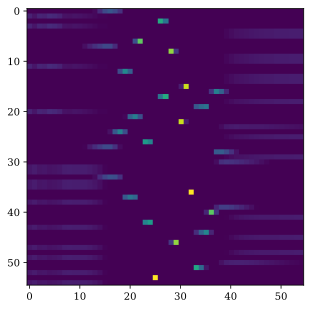

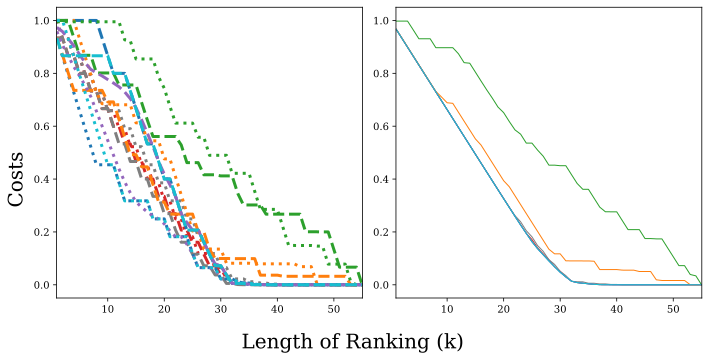

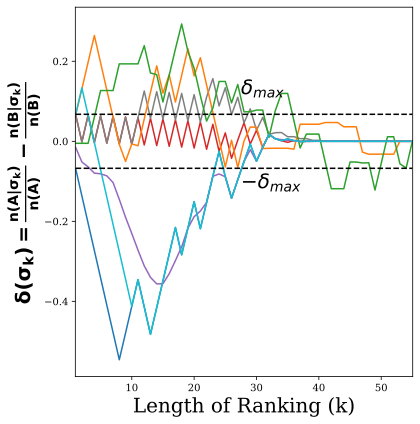

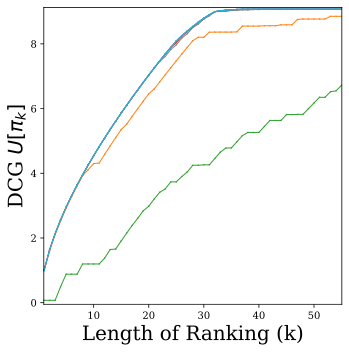

In [14]:
size_A=30
A_true = np.random.beta(a=1/20,b=1/20, size=size_A)
n_A=sum(A_true)
B_true=[]
n_B=0

rel_diff=1
while abs(n_A-n_B)>=rel_diff:
    B_true.append(np.random.beta(a=1/20,b=1/20, size=1).item())
    n_B=sum(B_true)

A_dist = [Bernoulli(p) for p in A_true]
B_dist = [Bernoulli(p) for p in B_true]

num_docs=len(A_true)+len(B_true)
exp = simpleOfflineMultipleGroups(num_groups=2, num_docs=num_docs, verbose=True,
                    predfined_ls=[A_dist, B_dist], distType=BetaBernoulli)
exp.experiment(rankingAlgos=[EO_RankerII, DP_Ranker, PRP_Ranker, TS_RankerII, Uniform_Ranker, exposure, epiRAnker],
               simulations=100)

cost_groups=exp.cost_groups
group_cost_std=exp.group_cost_std
EO_constraint=exp.EO_constraint
total_cost=exp.total_cost
total_cost_std=exp.total_cost_std
# EOR_std=exp.EOR_std
delta_max=exp.delta_max
dcg_util=exp.dcgUtil
rel = np.hstack((A_true,B_true))
assert rel.shape==(num_docs,)
iDcg = computeiDCG(np.array(rel)) 
nDCG=np.full((len(rankingAlgos), num_docs), 0.0, dtype=float)
for i, r in enumerate(rankingAlgos):
    nDCG[i,:]= np.divide(dcg_util[i,:],iDcg)

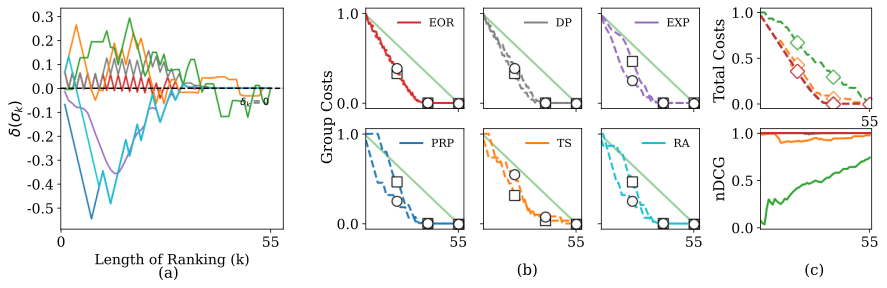

In [15]:
save_path='/share/thorsten/rr568/CostOptimal_FairRankings/plots'
filename=f"synthetic_low_disp_unc.pdf"
rankingAlgos=[EO_RankerII, DP_Ranker, PRP_Ranker, TS_RankerII, Uniform_Ranker, exposure, epiRAnker]
rankingAlgosName=[r.name() for r in rankingAlgos]
rankingAlgos_dict={'EOR':0,
                   'DP':1, 
                   'PRP':2, 
                   'TS':3, 
                   'Uniform':4,
                  'EXP':5,
                  'RA':6}
SynthMarker_dict={'Group A': MARKERS[0],
                  'Group B': MARKERS[1],
                  'Principal': MARKERS[4],}


num_docs=total_cost.shape[-1]
fig_kw={}
fig_kw['markevery']=(int(num_docs/3),int(num_docs/3))
fig_kw['linewidth']=2
fig_kw['markersize']=10
fig_kw['markeredgecolor']='black'
fig_kw['markeredgewidth']=1
fig_kw['ticklabelsize']=14
fig_kw['yLabelSize']=15
fig_kw['alpha_stochastic']=0.5
fig_kw['offset']=0.06
fig_kw['nrows']=1
fig_kw['ncols']=1
fig_kw['interval_y']=0.1
fig_kw['hspace']=0.025
fig_kw['wspace']=0.025
fig_kw['rasterized']=True

dcg_option=True
dcg=nDCG
fig_kw['figsize']=(12,4)

# fig_kw['figsize']=(14,4)
# dcg=None
# dcg_option=False

plot_synthetic(EO_constraint, cost_groups, total_cost, rankingAlgos, rankingAlgos_dict, SynthMarker_dict,
    save_path, filename, fig_kw, dcg_option=dcg_option, dcg=dcg)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 5128.45it/s]


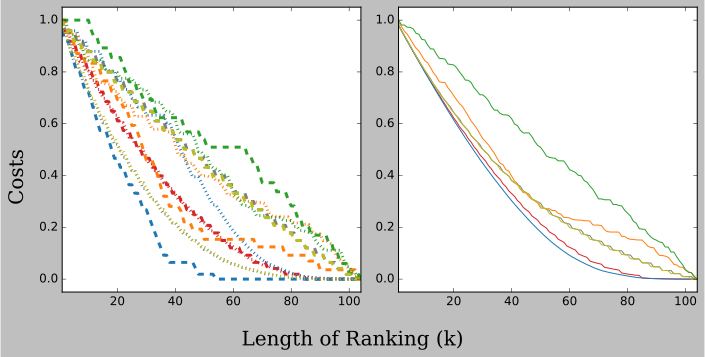

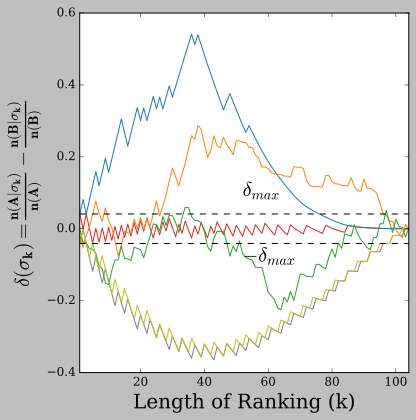

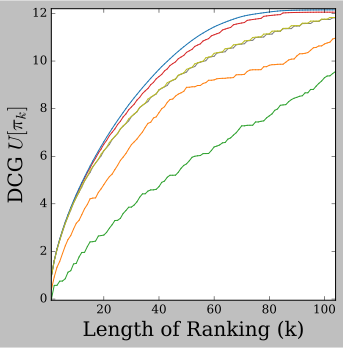

In [5]:
rankingAlgos=[EO_RankerII, DP_Ranker, PRP_Ranker, TS_RankerII, Uniform_Ranker, DP_RankerIII]
size_A=30
A_true = np.random.power(5, size=size_A)
n_A=sum(A_true)
B_true=[]
n_B=0

rel_diff=1
while abs(n_A-n_B)>=rel_diff:
    B_true.append(np.random.power(0.5, size=1).item())
    n_B=sum(B_true)

A_dist = [Bernoulli(p) for p in A_true]
B_dist = [Bernoulli(p) for p in B_true]

num_docs=len(A_true)+len(B_true)
exp = simpleOfflineMultipleGroups(num_groups=2, num_docs=num_docs, verbose=True,
                    predfined_ls=[A_dist, B_dist], distType=BetaBernoulli)
exp.experiment(rankingAlgos=rankingAlgos, 
               simulations=100)

cost_groups=exp.cost_groups
group_cost_std=exp.group_cost_std
EO_constraint=exp.EO_constraint
total_cost=exp.total_cost
total_cost_std=exp.total_cost_std
# EOR_std=exp.EOR_std
delta_max=exp.delta_max
dcg_util=exp.dcgUtil
rel = np.hstack((A_true,B_true))
assert rel.shape==(num_docs,)
iDcg = computeiDCG(np.array(rel)) 
nDCG=np.full((len(rankingAlgos), num_docs), 0.0, dtype=float)
for i, r in enumerate(rankingAlgos):
    nDCG[i,:]= np.divide(dcg_util[i,:],iDcg)

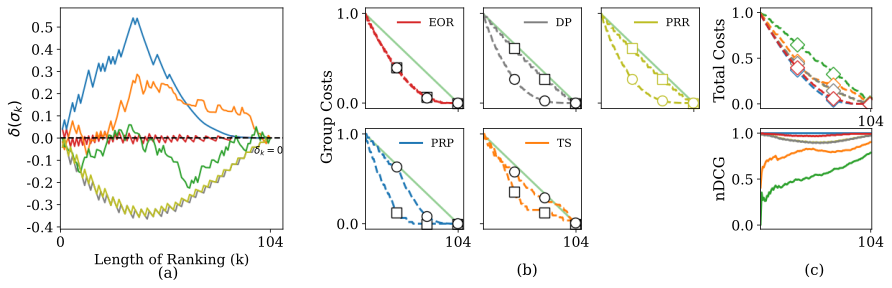

In [6]:
legendFileName=f"PRR_legend.pdf"
save_path='/share/thorsten/rr568/CostOptimal_FairRankings/plots'
filename=f"synthetic_PRR.pdf"
rankingAlgos=[EO_RankerII, DP_Ranker, PRP_Ranker, TS_RankerII, Uniform_Ranker, DP_RankerIII]
rankingAlgosName=[r.name() for r in rankingAlgos]
rankingAlgos_dict={'EOR':0,
                   'DP':1, 
                   'PRP':2, 
                   'TS':3, 
                   'Uniform':4,
                  'PRR':5,
}
SynthMarker_dict={'Group A': MARKERS[0],
                  'Group B': MARKERS[1],
                  'Principal': MARKERS[4],}


num_docs=total_cost.shape[-1]
fig_kw={}
fig_kw['markevery']=(int(num_docs/3),int(num_docs/3))
fig_kw['linewidth']=2
fig_kw['markersize']=10
fig_kw['markeredgecolor']='black'
fig_kw['markeredgewidth']=1
fig_kw['ticklabelsize']=14
fig_kw['yLabelSize']=15
fig_kw['alpha_stochastic']=0.5
fig_kw['offset']=0.06
fig_kw['nrows']=1
fig_kw['ncols']=1
fig_kw['interval_y']=0.1
fig_kw['hspace']=0.025
fig_kw['wspace']=0.025
fig_kw['rasterized']=True

dcg_option=True
dcg=nDCG
fig_kw['figsize']=(12,4)

# fig_kw['figsize']=(14,4)
# dcg=None
# dcg_option=False

plot_synthetic_prr(EO_constraint, cost_groups, total_cost, rankingAlgos, rankingAlgos_dict, SynthMarker_dict,
    save_path, filename, fig_kw, dcg_option=dcg_option, dcg=dcg)